In [20]:
# import 
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

In [21]:
# Define a function to parse the file
def parse_course_file(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()

    data = []
    for i in range(0, len(lines), 8):
        course_info = {}
        
        # Extract course name
        course_line = lines[i].strip()
        course_name_match = re.search(r'COURSE: (.+) F\d{4}', course_line)
        if course_name_match:
            course_info['Course Name'] = course_name_match.group(1)
        else:
            # Handle the case where the pattern does not match
            course_info['Course Name'] = None

        # Other extraction steps...

    return pd.DataFrame(data)

In [24]:
# get list of files in log directory
log_files = ["../logs/" + log for log in os.listdir(f"../logs") if "_raw_stats" in log]

In [25]:
print(log_files)

['../logs/F2023_raw_stats.txt', '../logs/S2023_raw_stats.txt']


In [42]:
stats_df = pd.DataFrame(columns=["Course Name", "Total", "Per Credit"])
# read log_files[0]
for log_file in log_files:
    f = open(log_file, "r")

    # split f by lines that are empty
    lines = f.read().split("\n\n")

    for i in range(len(lines)):
        if i % 2 != 0: 
            analysis = lines[i].split("\n")
            course = analysis[0][analysis[0].index("("):]
            total = float(analysis[1].split(" : ")[1].split(" ")[0])
            per_credit = float(analysis[3].split(" : ")[1].split(" ")[0])
            stats_df.loc[len(stats_df)] = [course, total, per_credit]
        
# display sorted df by per credit
stats_df.sort_values(by=["Per Credit"], inplace=True, ascending=False)
display(stats_df)

,Course Name,Total,Per Credit
1,(HNRS435A) F2023,69.66,1.45
2,(CSCI306) F2023,55.98,1.17
3,(CSCI406) F2023,55.60,1.16
6,(HNRS315) S2023,47.41,0.99
0,(CSCI442) F2023,41.86,0.87
4,(CSCI403) S2023,33.57,0.70
7,(CHGN121) S2023,33.67,0.70
8,(HASS327) S2023,33.79,0.70
5,(CSCI341) S2023,29.20,0.61


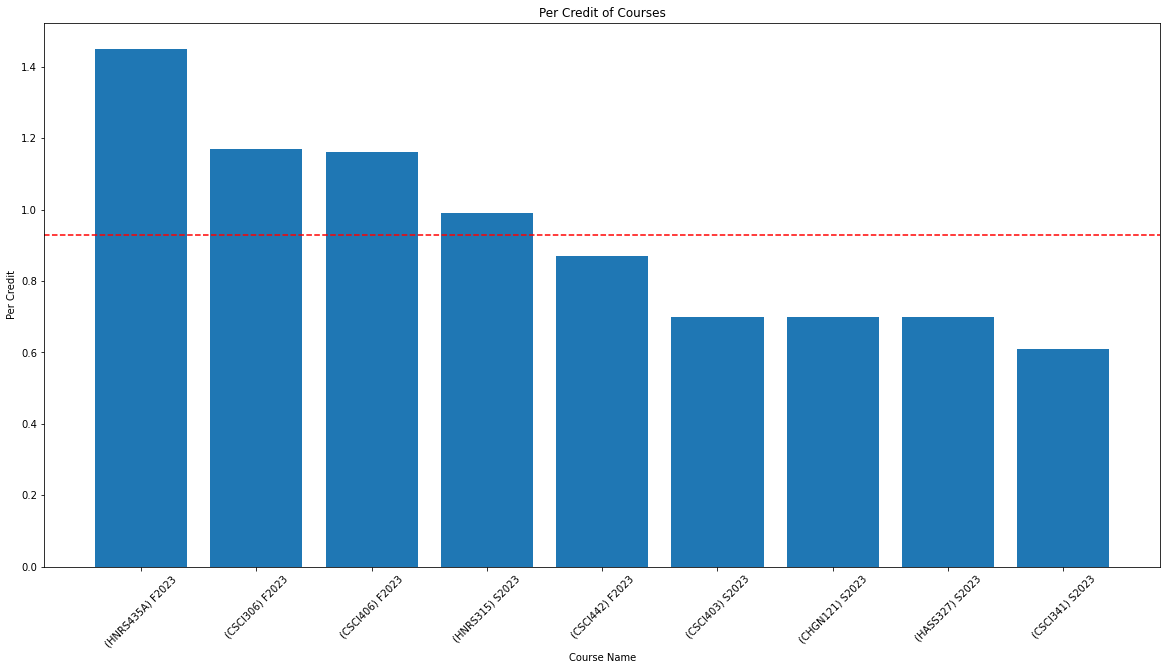

In [46]:
# create bar chart of stats_df sorted by per credit
plt.figure(figsize=(20, 10))
plt.bar(stats_df["Course Name"], stats_df["Per Credit"])

# plot line of average per credit
plt.axhline(y=stats_df["Per Credit"].mean(), color='r', linestyle='--')

plt.xticks(rotation=45)
plt.xlabel("Course Name")
plt.ylabel("Per Credit")
plt.title("Per Credit of Courses")
plt.show()


In [ ]:
# save stats_df to csv
stats_df.to_csv("../data/hour_per_credit.csv", index=False)